#Instructor: Alfonso Berumen
#Pepperdine University
#ISTM 627 - Spring 2023

#**Setting up the initial notebook**
####Import Python packages

In [ ]:
#RERUN THIS IF YOUR CONNECTION GETS RESET

#import pandas:
import pandas as pd
#import numpy:
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#several others
import scipy
import sklearn
import os as os

#let's test out the relationships
import seaborn as sn
import matplotlib.pyplot as plt

#regression
from statsmodels.api import OLS
import statsmodels.formula.api as smf

#load some libraries
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

#take the exponential
import math

#import regression libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#import os as os
#import statsmodels.api as sm

In [ ]:
os.getcwd()

'/content'

##Week 5

##Regression for Marketing Activities and Elasticity

##Beer Sales

In [ ]:
#Upload files via google colab (not a typical import process for Python)
from google.colab import files
files.upload()

{}

In [ ]:
#Python dataset
beer = pd.read_csv('/content/Elasticity.csv');

In [ ]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           52 non-null     int64  
 1   PRICE 12PK     52 non-null     float64
 2   CASES 12PK     52 non-null     float64
 3   PRICE 30PK     52 non-null     float64
 4   CASES 30PK     52 non-null     float64
 5   PRICE_12PK_LN  52 non-null     float64
 6   CASES_12PK_LN  52 non-null     float64
 7   PRICE_30PK_LN  52 non-null     float64
 8   CASES_30PK_LN  52 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 3.8 KB


In [ ]:
beer.head()

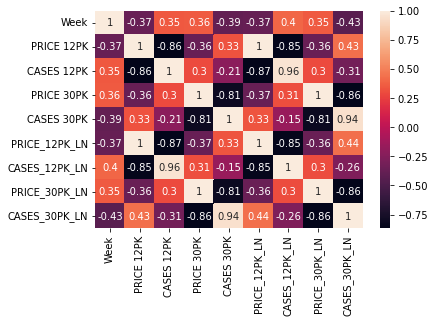

In [ ]:
#correlation matrix
corrMatrix = beer.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#model
est_12pack = smf.ols('CASES_12PK_LN ~ PRICE_12PK_LN',beer).fit()
#get standard output
est_12pack.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CASES_12PK_LN   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     130.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.49e-15
Time:                        01:26:20   Log-Likelihood:                -10.091
No. Observations:                  52   AIC:                             24.18
Df Residuals:                      50   BIC:                             28.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.6029      1.033     17.034      0.000      15.527      19.679
PRICE_12PK_LN    -4.0105      0.351    -11.429      0.000      -4.715      -3.306
==============================================================================
Omnibus:                        2.620   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.947
Skew:                          -0.087   Prob(JB):                        0.378
Kurtosis:                       3.932   Cond. No.                         81.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#model
est_30pack = smf.ols('CASES_30PK_LN ~ PRICE_30PK_LN',beer).fit()
#get standard output
est_30pack.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CASES_30PK_LN   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     140.8
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           3.72e-16
Time:                        01:26:27   Log-Likelihood:                -18.423
No. Observations:                  52   AIC:                             40.85
Df Residuals:                      50   BIC:                             44.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        32.2845      2.310     13.976      0.000      27.645      36.924
PRICE_30PK_LN   -10.2873      0.867    -11.868      0.000     -12.028      -8.546
==============================================================================
Omnibus:                        2.703   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.259   Jarque-Bera (JB):                1.638
Skew:                          -0.162   Prob(JB):                        0.441
Kurtosis:                       2.193   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Case Study: Goodbelly + Elasticity

In [ ]:
#Upload files via google colab (not a typical import process for Python)
from google.colab import files
files.upload()

In [ ]:
#Python dataset
goodbelly = pd.read_csv('Good Belly.csv')
goodbelly.head()

In [ ]:
goodbelly.shape

In [ ]:
#regression
from statsmodels.api import OLS
import statsmodels.formula.api as smf

In [ ]:
#correlation matrix
corrMatrix = goodbelly.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#model
est = smf.ols('Units_Sold ~ Average_Retail_Price + Sales_Rep + Endcap + Demo + Demo1_3 + Demo4_5',goodbelly).fit()

In [ ]:
#get standard output
est.summary()

In [ ]:
#predicted values
#using the training data
pred = est.fittedvalues
resid = est.resid

# disable chained assignments
pd.options.mode.chained_assignment = None

goodbelly['yhat'] = pred #predicted values
goodbelly['resid'] = resid #residual values

In [ ]:
goodbelly.head()

In [ ]:
print(goodbelly['yhat'])

In [ ]:
#plot the actual and predicted
#add a line
lineStart = goodbelly.Units_Sold.min()
lineEnd = goodbelly.Units_Sold.max()
plt.figure()
plt.scatter(goodbelly['Units_Sold'],goodbelly['yhat'], marker='o',color = 'k', alpha=0.5)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [ ]:
#residual
residcalc = goodbelly['Units_Sold'] - goodbelly['yhat']
residcalc.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Sales prediction error')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#Mean Squared Error
mean_squared_error(goodbelly['Units_Sold'], goodbelly['yhat'], squared=True)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
#Mean Absolute Error
mean_absolute_error(goodbelly['Units_Sold'], goodbelly['yhat'])

In [ ]:
#What about elasiticity?

In [ ]:
#first let's look at the relationship
#create plot
plt.figure(figsize=(8, 6))
plt.scatter(goodbelly['Average_Retail_Price'],
            goodbelly['Units_Sold'])
plt.title("Units Sold vs. Price")
plt.xlabel("Average Retail Price")
plt.ylabel("Units Sold")

In [ ]:
#add variables
goodbelly['ln_units_sold'] = np.log(goodbelly['Units_Sold'])
goodbelly['ln_avg_retail_price'] = np.log(goodbelly['Average_Retail_Price'])

In [ ]:
goodbelly.head()

In [ ]:
#create plot
plt.figure(figsize=(8, 6))
plt.scatter(goodbelly['ln_avg_retail_price'],
            goodbelly['ln_units_sold'])
plt.title("Ln Units Sold vs. Ln Price")
plt.xlabel("Ln Average Retail Price")
plt.ylabel("Ln Units Sold")

In [ ]:
#log-log model
ln_est = smf.ols('ln_units_sold ~ ln_avg_retail_price + Sales_Rep + Endcap + Demo + Demo1_3 + Demo4_5',goodbelly).fit()
ln_est.summary()

How do we interpret the dummy variables? See supplemental document.

If D switches from 0 to 1, the % impact of D on Y is 100[exp(c) - 1].               

If D switches from 1 to 0, the % impact of D on Y is 100[exp(-c) - 1].

For example, if c = 0.6, the naïve econometrician will conclude that there is a 60% impact; whereas it is really an 82.2% positive impact as D changes from 0 to 1, and a 45.1% negative impact as D goes from 1 to 0!

In [ ]:
100*(np.exp(0.6)-1)

In [ ]:
#Let's look at demo going from 0 to 1
100*(np.exp(0.3569)-1)

So, having a demo corresponds to a 42.9% positive impact on unit sales (going from no demo to demo)

# Case Study: Jumpstart Code

##Svedka Vodka

In [ ]:
#Upload files via google colab (not a typical import process for Python)
from google.colab import files
files.upload()

In [ ]:
#bring the data into Python
svedka_data=pd.read_csv("Svedka.csv",encoding = "utf-8") #import the data
len(svedka_data)#number of records
svedka_data.info()#fields
svedka_data.head(30)

In [ ]:
#test out the natural log formula and verify column values
np.log(svedka_data['TotalSales'])

In [ ]:
#let's test out the relationships
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
#correlation matrix
corrMatrix = svedka_data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
svedka_data.info()

In [ ]:
#model 1
est = smf.ols('LnSales ~ LnLSales + LnPrice + LnMag + LnNews + LnOut + LnBroad + LnPrint',svedka_data).fit()
est.summary()

In [ ]:
#model 2
est2 = smf.ols('LnDiff ~ LnLPrice + LnOut + LnBroad + LnPrint',svedka_data).fit()
est2.summary()

In [ ]:
#model 3
est3 = smf.ols('LnDiff ~ LnLPrice + LnOut + LnBroad + LnPrint + Tier1 + Tier2',svedka_data).fit()
est3.summary()

In [ ]:
#model 4
est4 = smf.ols('LnDiff ~ LnLPrice + LnOut + LnBroad + LnPrint + Tier1 + Tier2 + LagTotalMinusSales',svedka_data).fit()
est4.summary()

In [ ]:
#model 5
est5 = smf.ols('LnDiff ~ LnLPrice + LnOut + LnBroad + LnPrint + Tier1 + Tier2 + LagTotalMinusSales + Firstintro',svedka_data).fit()
est5.summary()